## Preprocessing copied from Data Cleaning Notebook and altered

In [1]:
import os
import time
import shutil
import random

import numpy as np
import pandas as pd
from IPython.display import Image

import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\01134172014.stubuic\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
total_folders = len(os.listdir("Fayyaz"))
print("Total number of folders containing images are", total_folders)

Total number of folders containing images are 5


In [3]:
main_folder = os.path.join(os.getcwd(), "Fayyaz") # folder that contains images in 281 folders
new_folder_path = os.path.join(os.getcwd(), "Preprocessed") # new folder containing all images

In [4]:
start_time = time.time()

positive_counter = 0
negative_counter = 0

positive_selected_images = []
negative_selected_images = []

for number_based_folder in os.listdir(main_folder):
    
    path_of_sub_folder = os.path.join(main_folder, number_based_folder)
    for sub_folder in os.listdir(path_of_sub_folder):
        
        path_of_images_folder = os.path.join(path_of_sub_folder, sub_folder)
        for image in os.listdir(path_of_images_folder):
            if(negative_counter < 5):
                if (image[-5:] == "0.png"): # ends with 0.png means a negative sample
                    negative_selected_images.append(image)
                    shutil.copy(os.path.join(path_of_images_folder, image), new_folder_path)
                    negative_counter = negative_counter + 1

            if(positive_counter < 5):
                if (image[-5:] == "1.png"): # ends with 1.png means a positive sample
                    positive_selected_images.append(image)
                    shutil.copy(os.path.join(path_of_images_folder, image), new_folder_path)
                    positive_counter = positive_counter + 1
        
            if((positive_counter == 5) and (negative_counter == 5)):
                break
        if((positive_counter == 5) and (negative_counter == 5)):
            break
    if((positive_counter == 5) and (negative_counter == 5)):
        break
        
end_time = time.time()

print("Time taken for running this code block", round(end_time - start_time, 2), " seconds")

print("")
print("")
print("Negative sample images : ", negative_selected_images)
print("")
print("Positive sample images : ", positive_selected_images)

Time taken for running this code block 0.38  seconds


Negative sample images :  ['10253_idx5_x1001_y1001_class0.png', '10253_idx5_x1001_y1051_class0.png', '10253_idx5_x1001_y1101_class0.png', '10253_idx5_x1001_y1151_class0.png', '10253_idx5_x1001_y1201_class0.png']

Positive sample images :  ['10253_idx5_x501_y351_class1.png', '10253_idx5_x501_y401_class1.png', '10253_idx5_x551_y301_class1.png', '10253_idx5_x551_y351_class1.png', '10253_idx5_x551_y401_class1.png']


In [5]:
total_images = len(os.listdir(new_folder_path))
print("Total number of images are", total_images)

Total number of images are 10


In [6]:
negative_images = []
positive_images = []
for image in os.listdir(new_folder_path):
    if(image[-5:] == ("0.png")):
        negative_images.append(image)
    else:
        positive_images.append(image)
negative_samples = len(negative_images)
positive_samples = len(positive_images)
negative_samples

5

#### Visualize Positive and Negative images

In [9]:
import cv2

Negative Images


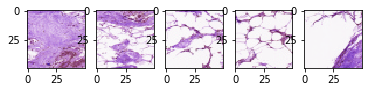

In [15]:
ncount = 1
print('Negative Images')
# plt.xlabel('Negative Images')
for image in os.listdir(new_folder_path):
    IMG = cv2.imread(os.path.join(new_folder_path, image))
    
    if(image[-5:] == ("0.png")):
        plt.subplot(1, 5 , ncount)
        plt.imshow(IMG)
        ncount = ncount + 1

        


Positive Images


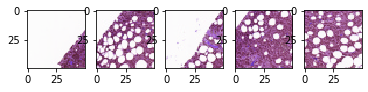

In [16]:
pcount = 1
print('Positive Images')
# plt.xlabel('Positive Images')
for image in os.listdir(new_folder_path):
    IMG = cv2.imread(os.path.join(new_folder_path, image))
    if(image[-5:] == ("1.png")):
        plt.subplot(1, 5 , pcount)
        plt.imshow(IMG)
        pcount = pcount + 1

#### Normalize Image for Visualization

Negative Images


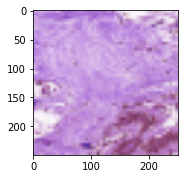

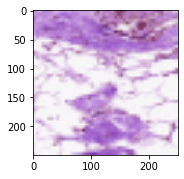

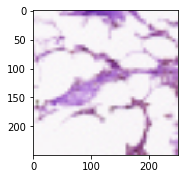

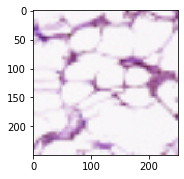

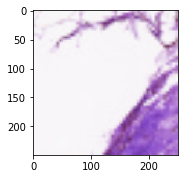

In [38]:
ncount = 1
print('Negative Images')
# plt.xlabel('Negative Images')
for image in os.listdir(new_folder_path):
    IMG = cv2.imread(os.path.join(new_folder_path, image))/255
    resized = cv2.resize(IMG, (250, 250))

#     print(IMG[0][:10][0])
    if(image[-5:] == ("0.png")):
        plt.figure(figsize = (15,15))
        plt.subplot(1, 5 , ncount)
        plt.imshow(resized)
        ncount = ncount + 1

Positive Images


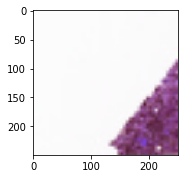

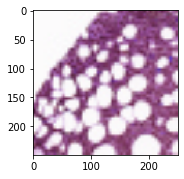

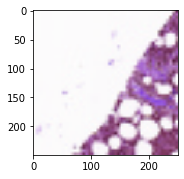

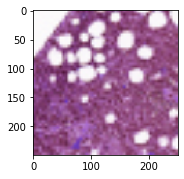

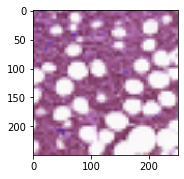

In [39]:
pcount = 1
print('Positive Images')
# plt.xlabel('Negative Images')
for image in os.listdir(new_folder_path):
    IMG = cv2.imread(os.path.join(new_folder_path, image))/255
    resized = cv2.resize(IMG, (250, 250))

#     print(IMG[0][:10][0])
    if(image[-5:] == ("1.png")):
        plt.figure(figsize = (15,15))
        plt.subplot(1, 5 , pcount)
        plt.imshow(resized)
        pcount = pcount + 1

#### Percentage of +ve and -ve in Sample

In [32]:
def get_percentage(sample, total):
    """
    This function will compute and return the percentage of a sample from the total amount
    Input Param 1 : Sample Selected
    Input Param 2 : Total Size  
    Output : Percentage of selected sample upto 2 dp
    """
    return round(sample / total * 100, 2)

In [33]:


percentage_of_negative_in_sample_ten = get_percentage(negative_samples, total_images)
percentage_of_positive_in_sample_ten = get_percentage(positive_samples, total_images)

print("Percentage of negative images in sample of 10 : ", percentage_of_negative_in_sample_ten)
print("Percentage of positive images in sample of 10 : ", percentage_of_positive_in_sample_ten)

Percentage of negative images in sample of 10 :  50.0
Percentage of positive images in sample of 10 :  50.0


50.0